In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ("Laptop", 3, 75000),
    ("Smartphone", 5, 25000),
    ("Headphones", 10, 1500),
    ("Monitor", 4, 12000),
    ("Keyboard", 7, 2000),
    ("Mouse", 12, 800),
    ("Printer", 2, 9000),
    ("Tablet", 6, 18000),
    ("Smartwatch", 8, 7000),
    ("External HDD", 5, 4500),
    ("Camera", 3, 35000),
    ("Tripod", 9, 1200),
    ("Microphone", 4, 5500),
    ("Speaker", 6, 3000),
    ("Charger", 15, 500)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()


In [15]:
# Query total quantity and revenue by product
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

print("Sales Summary:")
print(df)

Sales Summary:
         product  total_qty   revenue
0         Camera          3  105000.0
1        Charger         15    7500.0
2   External HDD          5   22500.0
3     Headphones         10   15000.0
4       Keyboard          7   14000.0
5         Laptop          3  225000.0
6     Microphone          4   22000.0
7        Monitor          4   48000.0
8          Mouse         12    9600.0
9        Printer          2   18000.0
10    Smartphone          5  125000.0
11    Smartwatch          8   56000.0
12       Speaker          6   18000.0
13        Tablet          6  108000.0
14        Tripod          9   10800.0


<Figure size 1000x600 with 0 Axes>

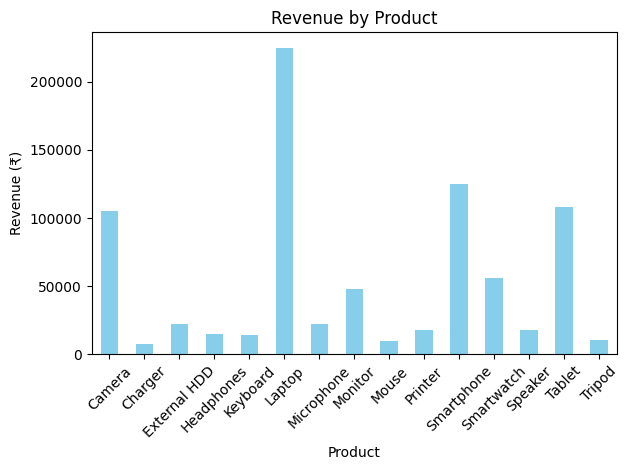

In [16]:
# Plot revenue by product
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [17]:
conn.close()
